
## Exploratory data analysis of the Irish weather


In [52]:
# Load in necessary packages


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('weather.csv', names = ['day', 'month', 'year', 'station', 'maxtp', 'mintp','rain','wdsp', 'hg', 'sun'])
data = data.drop(range(0,12))
data = data.reset_index()
del data['index']
data.head()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
0,1,jan,2021,Dublin Airport,5,-1.9,0,8.8,19,6.6
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19,2.4
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30,0.6
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27,0.6
4,5,jan,2021,Dublin Airport,5.2,1.2,1,9.5,25,1


The dataset weather gives us information about the weather conditions at the various airports in Ireland for the year 2021. We see the data recorded for the Dublin, Shanon and Cork Aiport. The different parameters are the day, month, year, max temp, min temp, rain recorded, Wind speed, highest gust and sunshine time in the day. According to the data we can see that the data is recorded for each day of the year. Considering the parameters such as rain and sunshine time we can feel that data is taken on an hourly basis and the average is taken to get the values.

In [3]:
count=[]
count.append(data['day'].isna().sum())
count.append(data['month'].isna().sum())
count.append(data['year'].isna().sum())
count.append(data['station'].isna().sum())
count.append(data['maxtp'].isna().sum())
count.append(data['mintp'].isna().sum())
count.append(data['rain'].isna().sum())
count.append(data['wdsp'].isna().sum())
count.append(data['hg'].isna().sum())
count.append(data['sun'].isna().sum())
count

[0, 0, 0, 0, 2, 2, 4, 1, 3, 2]

From the list we can see that the values are missing on the coloumns of min & max temp, rain, windspeed, highest gust and sunshine time. The reason of missing data is not entirely known but only reason that can be guessed is the issue with the satellite picking the data. The satellite must have missed the data or the data was too vague to get a specific value for the day. Because of these reasons we can notice null values in the dataset. In total we notice 14 missing values in the dataset.

Different Stratergies of dealing with missing data.

1. Removing the rows with NA values.

We can remove all the rows which have missing values in the dataset. The advantage of this method is that we can easily carry out the operation. Disadvantage is that we will miss a lot of values which can cause difference in the data.

2. Replacing the missing values with 0.

We can use 0 as a common value to be put in place of the missing value. The advantage is again the ease of the operation and the disadvantage is the changes in the values which can cause the visualization to look inconsistent.

3. Replacing with mean.

The problems of first 2 methods can be somewhat resolved by replacing the missing values with mean of the coloumn. This will give a better visualization plot whilst also preserving the data. The only problem is that in certain coloumns where the data is too spread out.

In [4]:
print(data['station'].unique())

['Dublin Airport' 'Shannon Airport' 'Cork Airport']


There are 3 weather stations for which the data is included.

In [5]:
data['mintp'] = data['mintp'].astype(float)
print(data[data.mintp==data.mintp.min()])

  day month  year         station maxtp  mintp rain wdsp  hg  sun
8   9   jan  2021  Dublin Airport   2.4   -5.9    0  6.5  19  6.8


On 9 Jan 2021 at Dublin Airport the min temperature of -5.9 C was recorded.

In [6]:
data['rain'] = data['rain'].astype(float)
print(data[data.rain==data.rain.max()])

     day month  year       station maxtp  mintp  rain  wdsp  hg sun
1029  27   oct  2021  Cork Airport  14.7   12.4  50.1  16.4  36   0


On 27 October 2012 at Cork Airport the max rain 0f 50.1 mm was recorded

In [7]:
data['mintp'].describe()


count    1093.000000
mean        6.950046
std         4.687423
min        -5.900000
25%         3.400000
50%         7.100000
75%        10.700000
max        18.700000
Name: mintp, dtype: float64

We can see that for minimum temperature the mean is at 6.95 with the min and max values at -5.9 C and 18.7 C respectively. We see a varied temperature range based on the seasons 

In [8]:
data['maxtp'] = data['maxtp'].astype(float)
data['maxtp'].describe()

count    1093.000000
mean       13.732662
std         5.107554
min         0.600000
25%        10.200000
50%        13.400000
75%        17.600000
max        29.600000
Name: maxtp, dtype: float64

Similiar data is seen in maximum temperature as well with the min and max values at 0.6 and 29.6 respectively suggesting that winters are extremely cold while the summers can get really hot with a mean value of 13.7

In [9]:
data['rain'].describe()

count    1091.000000
mean        2.596242
std         4.864790
min         0.000000
25%         0.000000
50%         0.300000
75%         3.050000
max        50.100000
Name: rain, dtype: float64

The data for rain shows the rainfall in mm over the various stations. Here we see the min value at 0 and max at 50.1 mm indicating the high amount of rain in the country. The mean value is aso at 2.5mm.

In [10]:
data['wdsp'] = data['wdsp'].astype(float)
data['wdsp'].describe()

count    1094.000000
mean        8.587020
std         3.705469
min         1.900000
25%         6.000000
50%         7.900000
75%        10.600000
max        26.300000
Name: wdsp, dtype: float64

The data for windspeed show the min windspeed at 1.9 knots while the max can go upto 26.3 knots. The mean is at 8.58 indiacting a high value of windspeed in the country

In [11]:
data['hg'] = data['hg'].astype(float)
data['hg'].describe()

count    1092.000000
mean       22.863553
std         8.396710
min         7.000000
25%        17.000000
50%        21.000000
75%        28.000000
max        64.000000
Name: hg, dtype: float64

The high gust data shows the gust speed in knots. The max value is 64 knots and the min is at 7 knots. with the mean at 22.86 knots.

In [12]:
data['sun'] = data['sun'].astype(float)
data['sun'].describe()

count    1093.000000
mean        4.036780
std         3.958998
min         0.000000
25%         0.300000
50%         2.900000
75%         6.600000
max        15.200000
Name: sun, dtype: float64

The sun data shows the hours of sunlight in the given day. We can see the min at 0 and max at 15.2 hrs. This gives us an idea that sunlight can be very different throughout the year. The mean sunlight per day is 4.03 hrs.

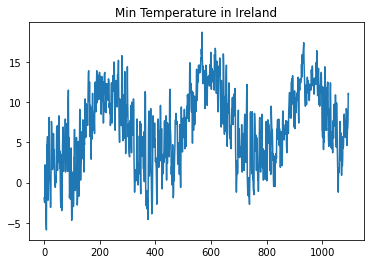

In [13]:
data['mintp'].plot(title='Min Temperature in Ireland')
plt.show()

Comparing the plot with the summary statistics, we see that the lowest point is around -5 C and the max point is about 15 C. 

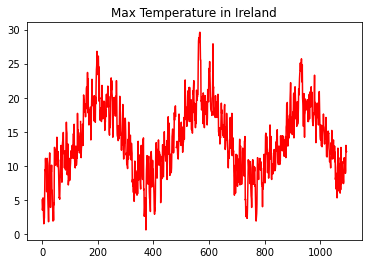

In [14]:
data['maxtp'].plot(color='red',title='Max Temperature in Ireland')
plt.show()

Comparing the above plot to the summary, we can see the maximum temperature at the lower end about 0-5 c with the maximum going as high as 30C

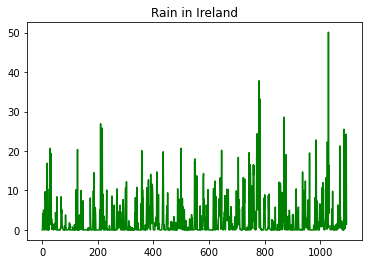

In [15]:
data['rain'].plot(color='green', title='Rain in Ireland')
plt.show()

Comparing the above plot to the summary, we can see the rain around the country. The plot shows that there is rainfall all round the year in Ireland with rainfall going as high as 50 mm for a day.

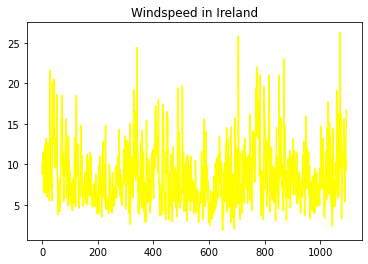

In [16]:
data['wdsp'].plot(color='yellow', title='Windspeed in Ireland')
plt.show()

The plot shows the windspeed throughout the year in Ireland. The lowestwindspped is around 5 knots with maximum above 25 knots. This is confirmed using the statistical summary. 

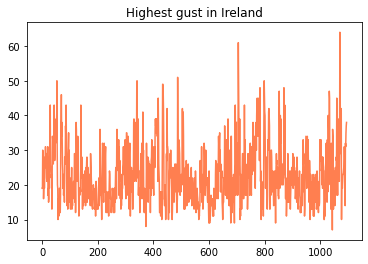

In [17]:
data['hg'].plot(color='coral', title='Highest gust in Ireland')
plt.show()

The highest gust in Ireland is shown in the above plot. We see the minimum gust at around 10 knots with maximum going over 60 knots. The statistic summary also shows the same data.

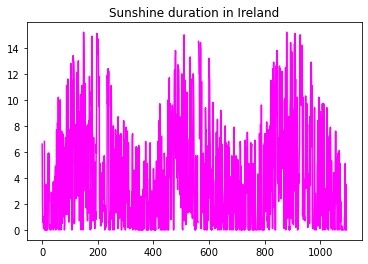

In [18]:
data['sun'].plot(color='magenta', title='Sunshine duration in Ireland')
plt.show()

The plot above shows the sunshine duration per day in Ireland. We cans see that The sunshine duration is really low in the winter months almost going upto 0 hrs. The maximum is seen during the summer months with sunshine upto 14 hrs per day.

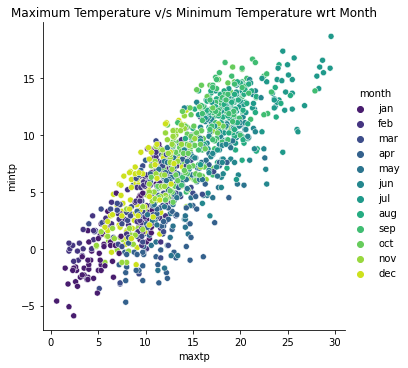

In [19]:
sns.relplot(data=data, x='maxtp', y='mintp', hue='month',palette='viridis').set(title='Maximum Temperature v/s Minimum Temperature wrt Month')
plt.show()

The plot shows the relation between maximum temperature and minimum temperature wrt month of the year. From the plot we can see that the temperature is really low during the months of Dec, Jan, Feb.The temperature is seen going up upto 30 C during the months of Jul, Aug and is between for the remaining months. The plot clearly shows the temperature spread as per the different seasons with the winter months being really cold and the summer months going as high upto 30 C

In [20]:
data['temp_range']=data['maxtp']-data['mintp']
data.head()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,temp_range
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6,6.9
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4,5.9
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6,6.4
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6,3.1
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0,4.0


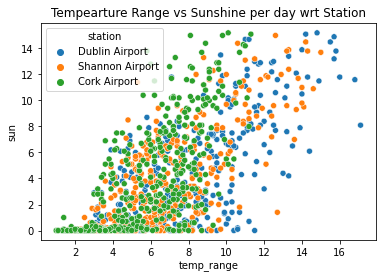

In [22]:
sns.scatterplot(data=data, x='temp_range', y='sun', hue='station').set(title='Tempearture Range vs Sunshine per day wrt Station')
plt.show()


The scatterplot above shows theTemperature range vs Sunshine hours per day with respect to different stations. The plot is for 3 Different stations i.e. The Dublin airport, Shanon Airport and Cork Airport. We can see that temperature ranges are lowest at the Cork Airport followed by the Shanon airport with the maximum temperature range and sunshine hours at the Dublin Airport. The min temperature range can go as low as 0 C with 0 hrs of sunshine per day at the Cork Airport. With the highest range of temperature going upto 12 C with 14 hrs of sunshine per day. At the Shanon Airport the lowest range of temperature is around 2 C with 2-4 hrs of sunshine per day. The maximum can go upto 14-16 C with over 14 hrs of sunshine per day. The temperature ranges are maximum at the Dublin Airport with the lowest around 2-4 C with 2 hrs of sunlight. The max temperature range for a day goes over 16 C with 10-14 hrs of sunlight per day.

In [55]:
data[data.station=='Dublin Airport'].describe()

,maxtp,mintp,rain,wdsp,hg,sun,temp_range
count,364.000000,364.000000,364.000000,365.000000,364.000000,364.000000,364.000000
mean,13.590934,6.001099,1.828846,8.625753,22.623626,4.089835,7.589835
std,5.258806,4.748774,3.878082,3.456376,7.790196,3.981802,3.199411
min,1.500000,-5.900000,0.000000,2.600000,10.000000,0.000000,1.400000
25%,10.000000,2.000000,0.000000,6.100000,17.000000,0.500000,5.200000
50%,13.300000,6.200000,0.100000,7.900000,21.000000,2.900000,7.350000
75%,18.100000,9.900000,1.325000,10.500000,27.250000,6.800000,9.800000
max,26.800000,15.800000,26.900000,24.400000,50.000000,15.200000,17.100000


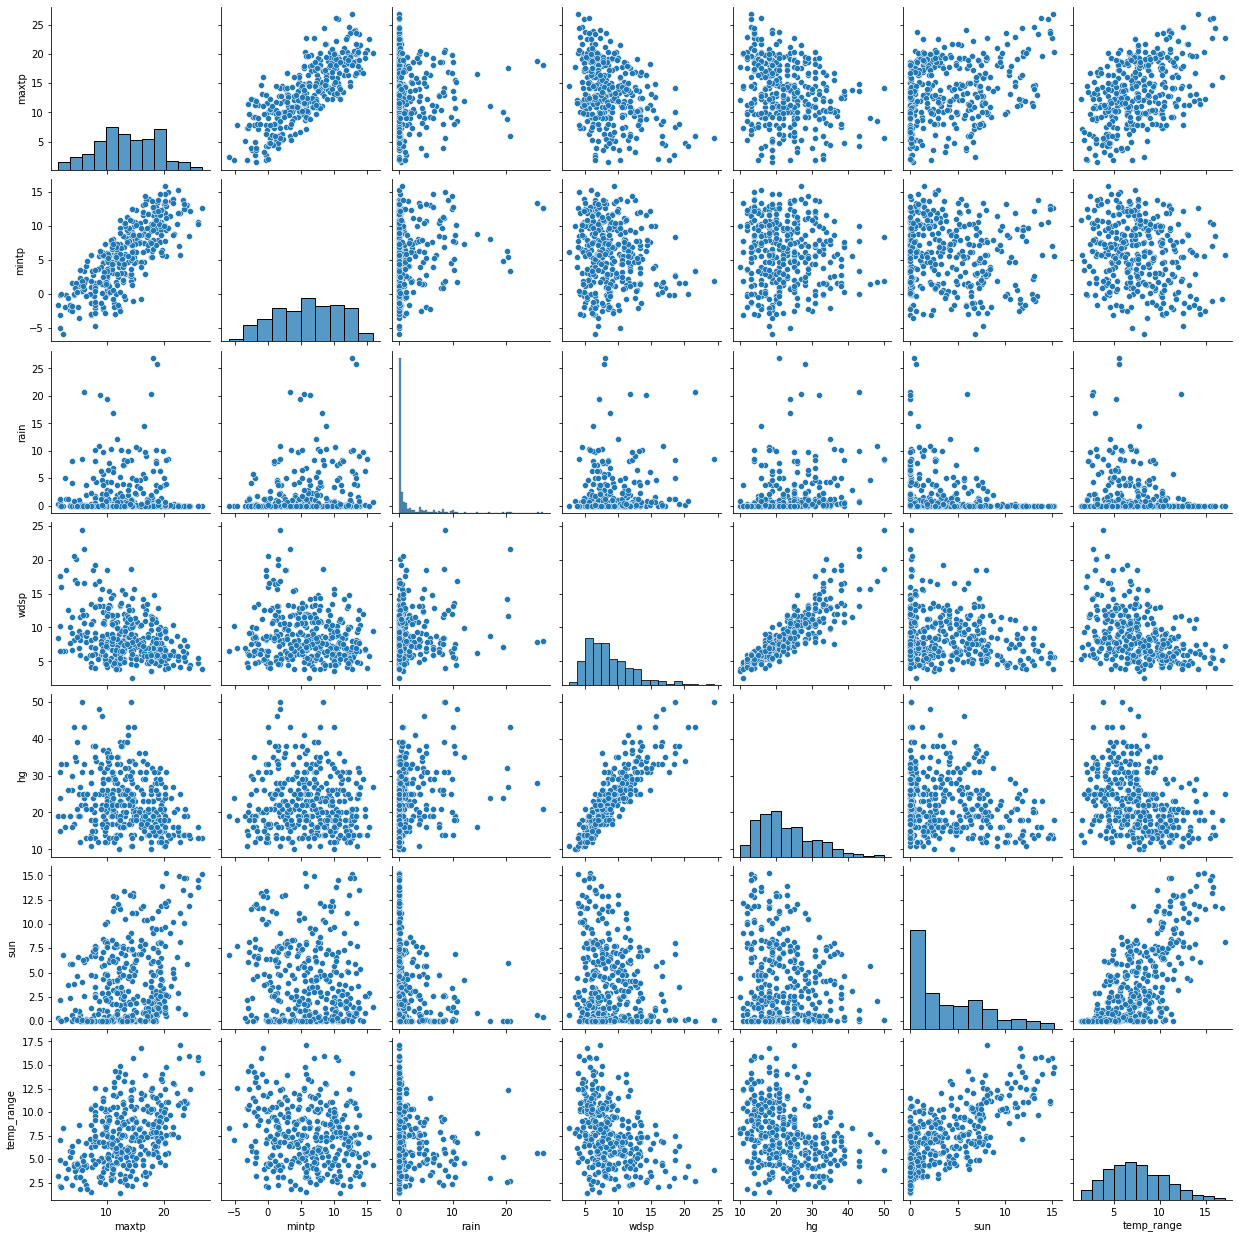

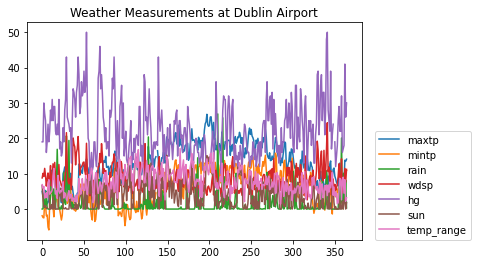

In [58]:
sns.pairplot(data[data.station=='Dublin Airport'])
data[data.station=='Dublin Airport'].plot(title='Weather Measurements at Dublin Airport')
plt.legend(loc=(1.04, 0))
plt.show()

The above data and plot shows the different weather measurements for Dublin Airport for the year of 2021. The numerical data gives the exact data for each of the weather measurements. The same can be seen with the plots. The first plot shows the plot of each data with respect to all the other measurements. The second plot is a general measurement of all the data. The legend shows the color associated with each plot on the right. From the data we can see that the maximum temperature can go upto 26 C with min falling as low as -6C. Dublin also records rain frequently with maximum of 26mm of rain in a day and the mean of upto 2 mm rain everyday. Dublin Airport also sees a good amount of windspeed and gust with maximum windspeed of 24 knots and max. gust of 50 knots. The mean windspeed and gust is around 8 and 22 respectively. The sunshine spread per day is also quite varied in Dublin airport with min of 0hrs per day and max going upto 15 hrs per day with a average sunshine of 4 hrs per day. The temperature range is quite large as well with temperature between maximum and minimum temperature of day varying upto 17C. The minimum variation is 1C with a mean of 7 C variation in a day.

In [56]:
data[data.station=='Shannon Airport'].describe()

,maxtp,mintp,rain,wdsp,hg,sun,temp_range
count,364.000000,364.000000,365.000000,365.000000,363.000000,364.000000,364.000000
mean,14.368681,7.611813,2.549041,7.815342,21.796143,3.856044,6.756868
std,5.175728,4.820239,4.007511,3.575878,8.372032,3.817264,2.834320
min,0.600000,-4.600000,0.000000,1.900000,8.000000,0.000000,1.700000
25%,11.100000,4.275000,0.000000,5.400000,16.000000,0.400000,4.800000
50%,14.100000,7.650000,0.500000,6.900000,20.000000,2.700000,6.300000
75%,18.000000,11.525000,3.400000,9.700000,26.000000,6.200000,8.425000
max,29.600000,18.700000,20.700000,25.800000,61.000000,15.000000,15.000000


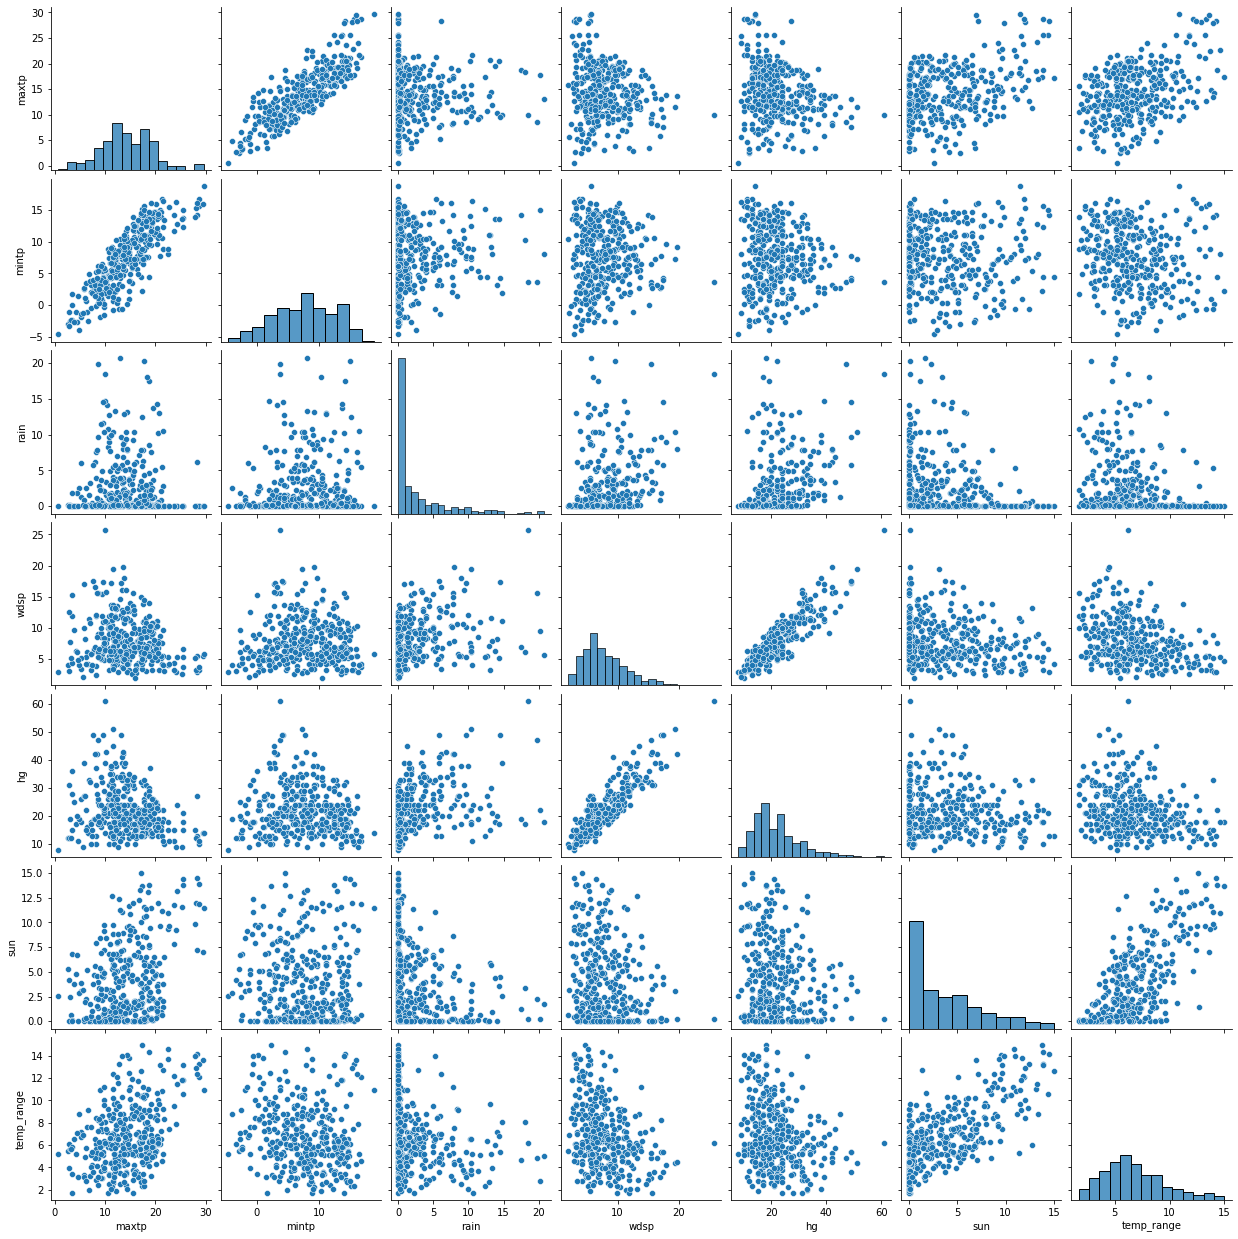

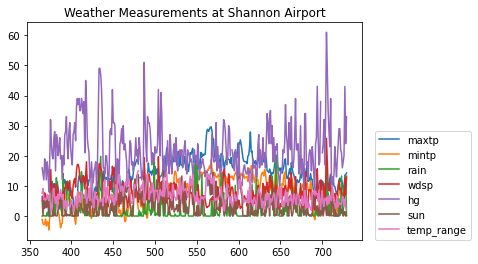

In [53]:
sns.pairplot(data[data.station=='Shannon Airport'])
data[data.station=='Shannon Airport'].plot(title='Weather Measurements at Shannon Airport')
plt.legend(loc=(1.04, 0))
plt.show()

The statistics and map above display several weather measures for Shannon Airport in 2021. The numerical information provides the precise information for each weather measurement. The plots show the same thing. The first graphic displays the data plotted against all other measurements. The second figure measures all the data broadly. Each plot's related color is displayed in the legend on the right. The data shows that the minimum temperature can drop to -4 C and the maximum temperature can reach 29 C. Shannon also experiences regular rainfall, with a daily maximum of 20mm and a daily average of up to 2.5mm.The greatest wind speed and gust at Shannon Airport are both respectable, at 25 knots and 61 knots, respectively. The mean of gust and wind speeds are approximately 21 and 7, respectively. The amount of sunshine per day varies quite a bit in Shannon Airport, with a minimum of 0 hours and a maximum of 15 hours, with an average of 4 hours. The difference between the maximum and minimum daytime temperatures varies by up to 15C, making the temperature range fairly wide. The smallest variation is 1C, with a daily average variation of 6C.

In [57]:
data[data.station=='Cork Airport'].describe()

,maxtp,mintp,rain,wdsp,hg,sun,temp_range
count,365.000000,365.000000,362.000000,364.000000,365.000000,365.000000,365.000000
mean,13.239726,7.236438,3.415470,9.321978,24.164384,4.164110,6.003288
std,4.826949,4.339971,6.234737,3.924194,8.843284,4.077572,2.342826
min,1.900000,-2.700000,0.000000,2.400000,7.000000,0.000000,1.000000
25%,9.900000,3.800000,0.000000,6.600000,18.000000,0.200000,4.300000
50%,12.800000,6.900000,0.600000,8.500000,23.000000,3.100000,6.200000
75%,16.800000,11.100000,4.300000,11.200000,29.000000,7.000000,7.800000
max,25.700000,17.400000,50.100000,26.300000,64.000000,15.200000,11.300000


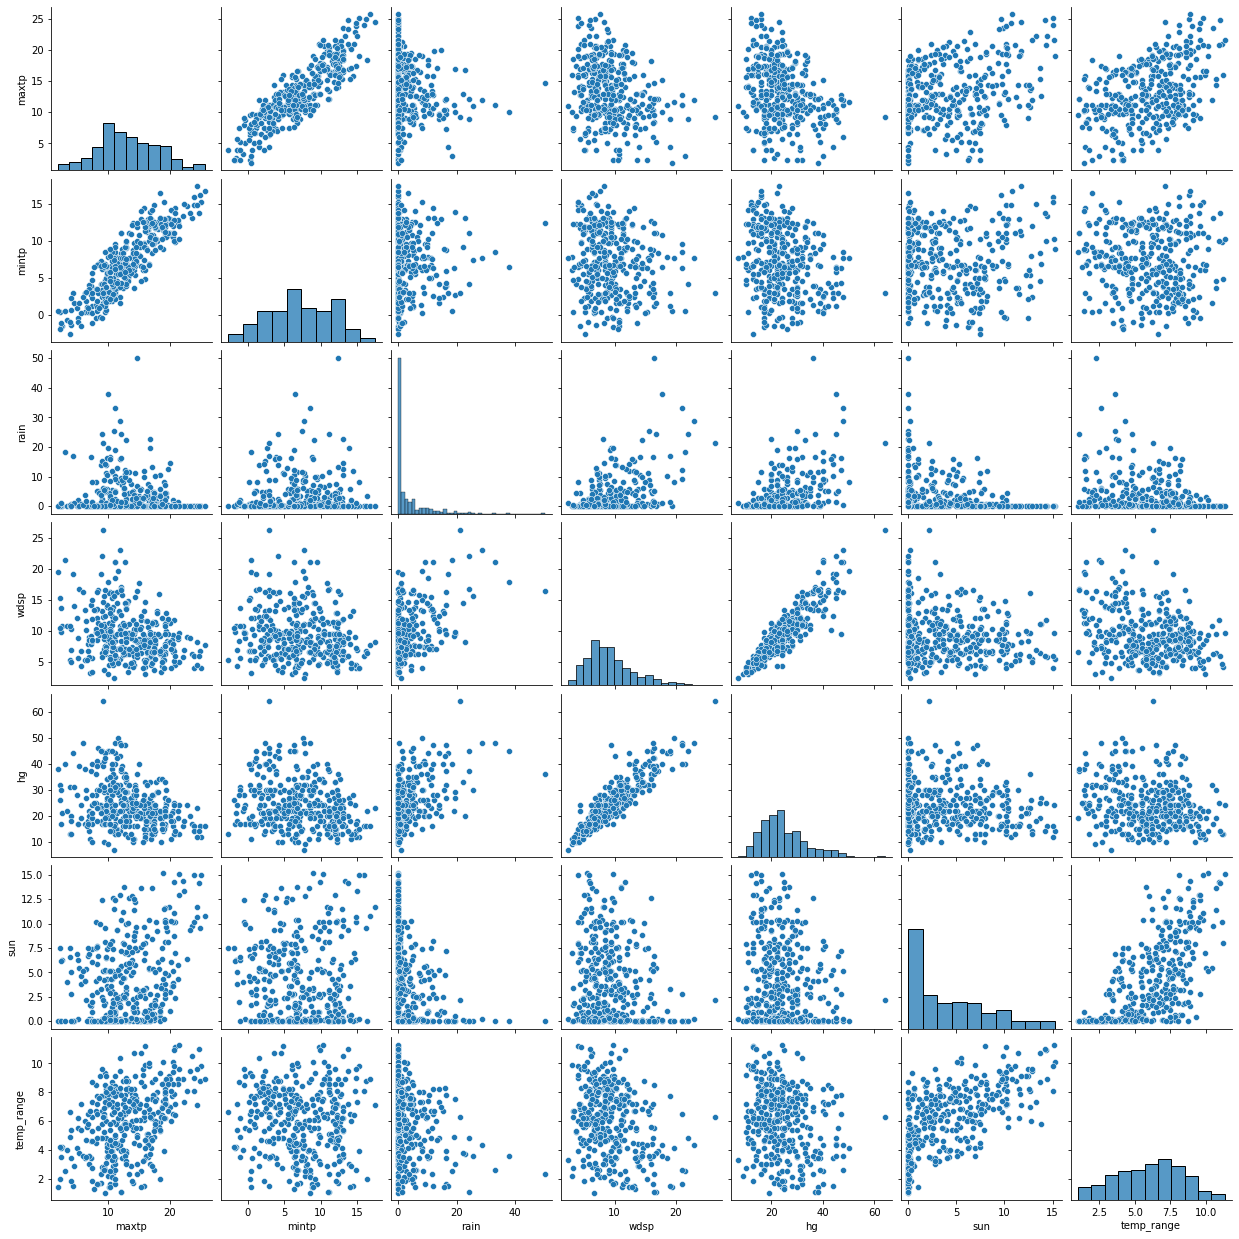

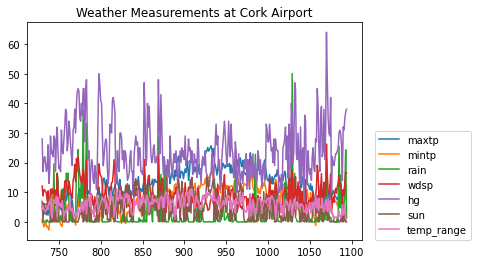

In [54]:
sns.pairplot(data[data.station=='Cork Airport'])
data[data.station=='Cork Airport'].plot(title='Weather Measurements at Cork Airport')
plt.legend(loc=(1.04, 0))
plt.show()

Several weather indicators for Cork Airport in 2021 are shown on the statistics and map above. The precise information for each weather measurement is provided by the numerical data. The stories depict the same event. The data are shown against all other measurements in the first graphic. The second graph represents the data as a whole. In the legend to the right, the color associated with each plot is shown. According to the statistics, temperatures can range from -2 C at the min to 25 C at the max. The average daily rainfall in Cork is up to 3 mm, with a daily maximum of 50 millimeters. At Cork Airport, the highest wind gust and speed are also respectable, coming in at 26 and 64 knots, respectively. Wind and gusts average between 24 and 9 miles respectively. Cork Airport experiences a wide range of daily sunshine, with an average of 4 hours and a minimum of 0 hours to a maximum of 15 hours. The temperature range is fairly extensive, with variations of up to 11C between the maximum and minimum daytime temperatures. The daily average variation is 6C, and the lowest variation is 1C.

Finally we can compare the weather in all three stations by comparing the values. We can see that Dublin Airport has the minimum tempearure of all in the winters followed by Shannon Airport with Cork airport being the least cold. The maximum and max mean temp is observed at Shannon Aiport, followed by Dublin Airport and then Cork. In terms of rain, Cork Airport is way above the other two with max of 50mm followed by Dublin Airport and finally Shannon Airport. In terms of average too Cork is above both with 3 mm of rain followed by Shannon with least rain per day at Dublin. Windspeeds are quite similiar in all the three airports with minimal differences. U will feel the highest gust at Cork Airport with 64 knots followed by Shannon Airport while Dublin comes next with 50 knots. The sunshine hours per day are pretty much the same in all the airports meaning we get equal sunshine in all three cities